# Table of Contents

# Exercise 1.4 – KNN Weather Prediction

## Table of Contents:
1. Introduction
2. Import Libraries
3. Load and Inspect Data
4. Preprocessing
5. Train-Test Split
6. KNN Modeling
7. Accuracy Results
8. Confusion Matrix Visualization
9. Observations and Conclusion


# 1. Introduction (Step 2)

## 1. Introduction

### This exercise aims to use K-Nearest Neighbors (KNN) to predict whether a day's weather is pleasant or not, based on temperature data from multiple weather stations in Europe. The model will classify days as either "pleasant" (1) or "unpleasant" (0), and results will be evaluated using accuracy scores and confusion matrices.


# 2. Import Libraries (Step 3)

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 3. Load and Inspect Data 

In [2]:
# Load weather data
weather = pd.read_csv("Dataset-weather-prediction-dataset-processed.csv")
answers = pd.read_csv("Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv")

# Preview data
print(weather.shape)
print(answers.shape)

weather.head()


(22950, 170)
(22950, 16)


,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [11]:
# Check original data before any cleaning
print("Original weather columns:", weather.columns.tolist())
print("Original answers columns:", answers.columns.tolist())


Original weather columns: ['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_

# 4. Preprocessing

In [12]:
# -----------------------------------------------------------
# Step 4: Preprocessing — Drop Date Columns Only
# -----------------------------------------------------------

# Drop only DATE and MONTH columns
weather_cleaned = weather.drop(columns=["DATE", "MONTH"])
answers_cleaned = answers.drop(columns=["DATE"])

# Print shapes to confirm
print("weather_cleaned shape:", weather_cleaned.shape)
print("answers_cleaned shape:", answers_cleaned.shape)




weather_cleaned shape: (22950, 168)
answers_cleaned shape: (22950, 15)


 ## Step 4.5. Sanity Checks 

In [13]:
print("Any NaNs in answers_cleaned?:", answers_cleaned.isnull().values.any())
print("Unique values in answers dataset:\n", answers_cleaned.nunique())
print("Data types in answers dataset:\n", answers_cleaned.dtypes.value_counts())


Any NaNs in answers_cleaned?: False
Unique values in answers dataset:
 BASEL_pleasant_weather         2
BELGRADE_pleasant_weather      2
BUDAPEST_pleasant_weather      2
DEBILT_pleasant_weather        2
DUSSELDORF_pleasant_weather    2
HEATHROW_pleasant_weather      2
KASSEL_pleasant_weather        2
LJUBLJANA_pleasant_weather     2
MAASTRICHT_pleasant_weather    2
MADRID_pleasant_weather        2
MUNCHENB_pleasant_weather      2
OSLO_pleasant_weather          2
SONNBLICK_pleasant_weather     1
STOCKHOLM_pleasant_weather     2
VALENTIA_pleasant_weather      2
dtype: int64
Data types in answers dataset:
 int64    15
Name: count, dtype: int64


In [9]:
print("weather_cleaned columns:\n", weather_cleaned.columns.tolist())
print("answers_cleaned columns:\n", answers_cleaned.columns.tolist())


weather_cleaned columns:
 []
answers_cleaned columns:
 []


# 5. Train-Test Split

In [14]:
X = weather_cleaned
y = answers_cleaned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set :", X_test.shape, y_test.shape)


Training set: (18360, 168) (18360, 15)
Testing set : (4590, 168) (4590, 15)


## Step 5.5. Fix Data Types

In [15]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("y_train shape:", y_train.shape)
print("Sample values:\n", y_train.head())


y_train shape: (18360, 15)
Sample values:
        BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
12262                       0                          1   
9334                        1                          1   
7100                        0                          0   
12030                       0                          0   
2958                        0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
12262                          1                        1   
9334                           1                        0   
7100                           1                        0   
12030                          0                        0   
2958                           0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
12262                            0                          1   
9334                             0                          0   
7100                             0

# 6. KNN Modeling

In [19]:
k_range = np.arange(1, 4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))

# Loop over each k and evaluate accuracy
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    train_acc[i] = classifier.score(X_train, y_train)
    test_acc[i] = classifier.score(X_test, y_test)

# Display accuracy for each k
for i, k in enumerate(k_range):
    print(f"k = {k}: Train Accuracy = {train_acc[i]*100:.2f}%, Test Accuracy = {test_acc[i]*100:.2f}%")



k = 1: Train Accuracy = 100.00%, Test Accuracy = 44.10%
k = 2: Train Accuracy = 56.30%, Test Accuracy = 45.56%
k = 3: Train Accuracy = 57.02%, Test Accuracy = 46.45%


# 7. Accuracy Results Visualization

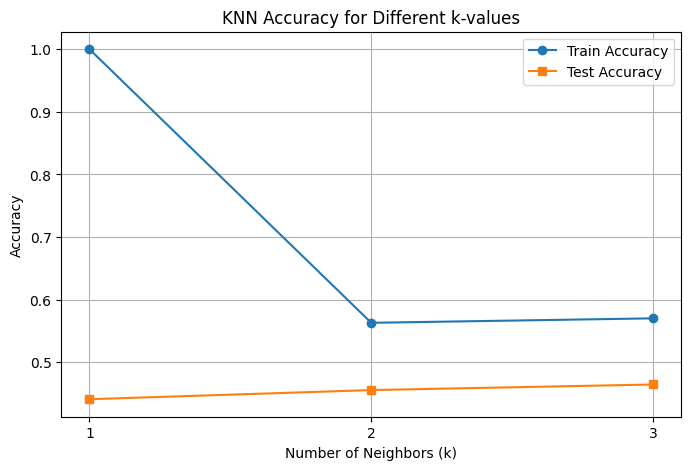

In [17]:

plt.figure(figsize=(8, 5))
plt.plot(k_range, train_acc, marker='o', label="Train Accuracy")
plt.plot(k_range, test_acc, marker='s', label="Test Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k-values")
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()


# 8. Confusion Matrix Visualization

Best k selected: 3


D:\software\Python\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


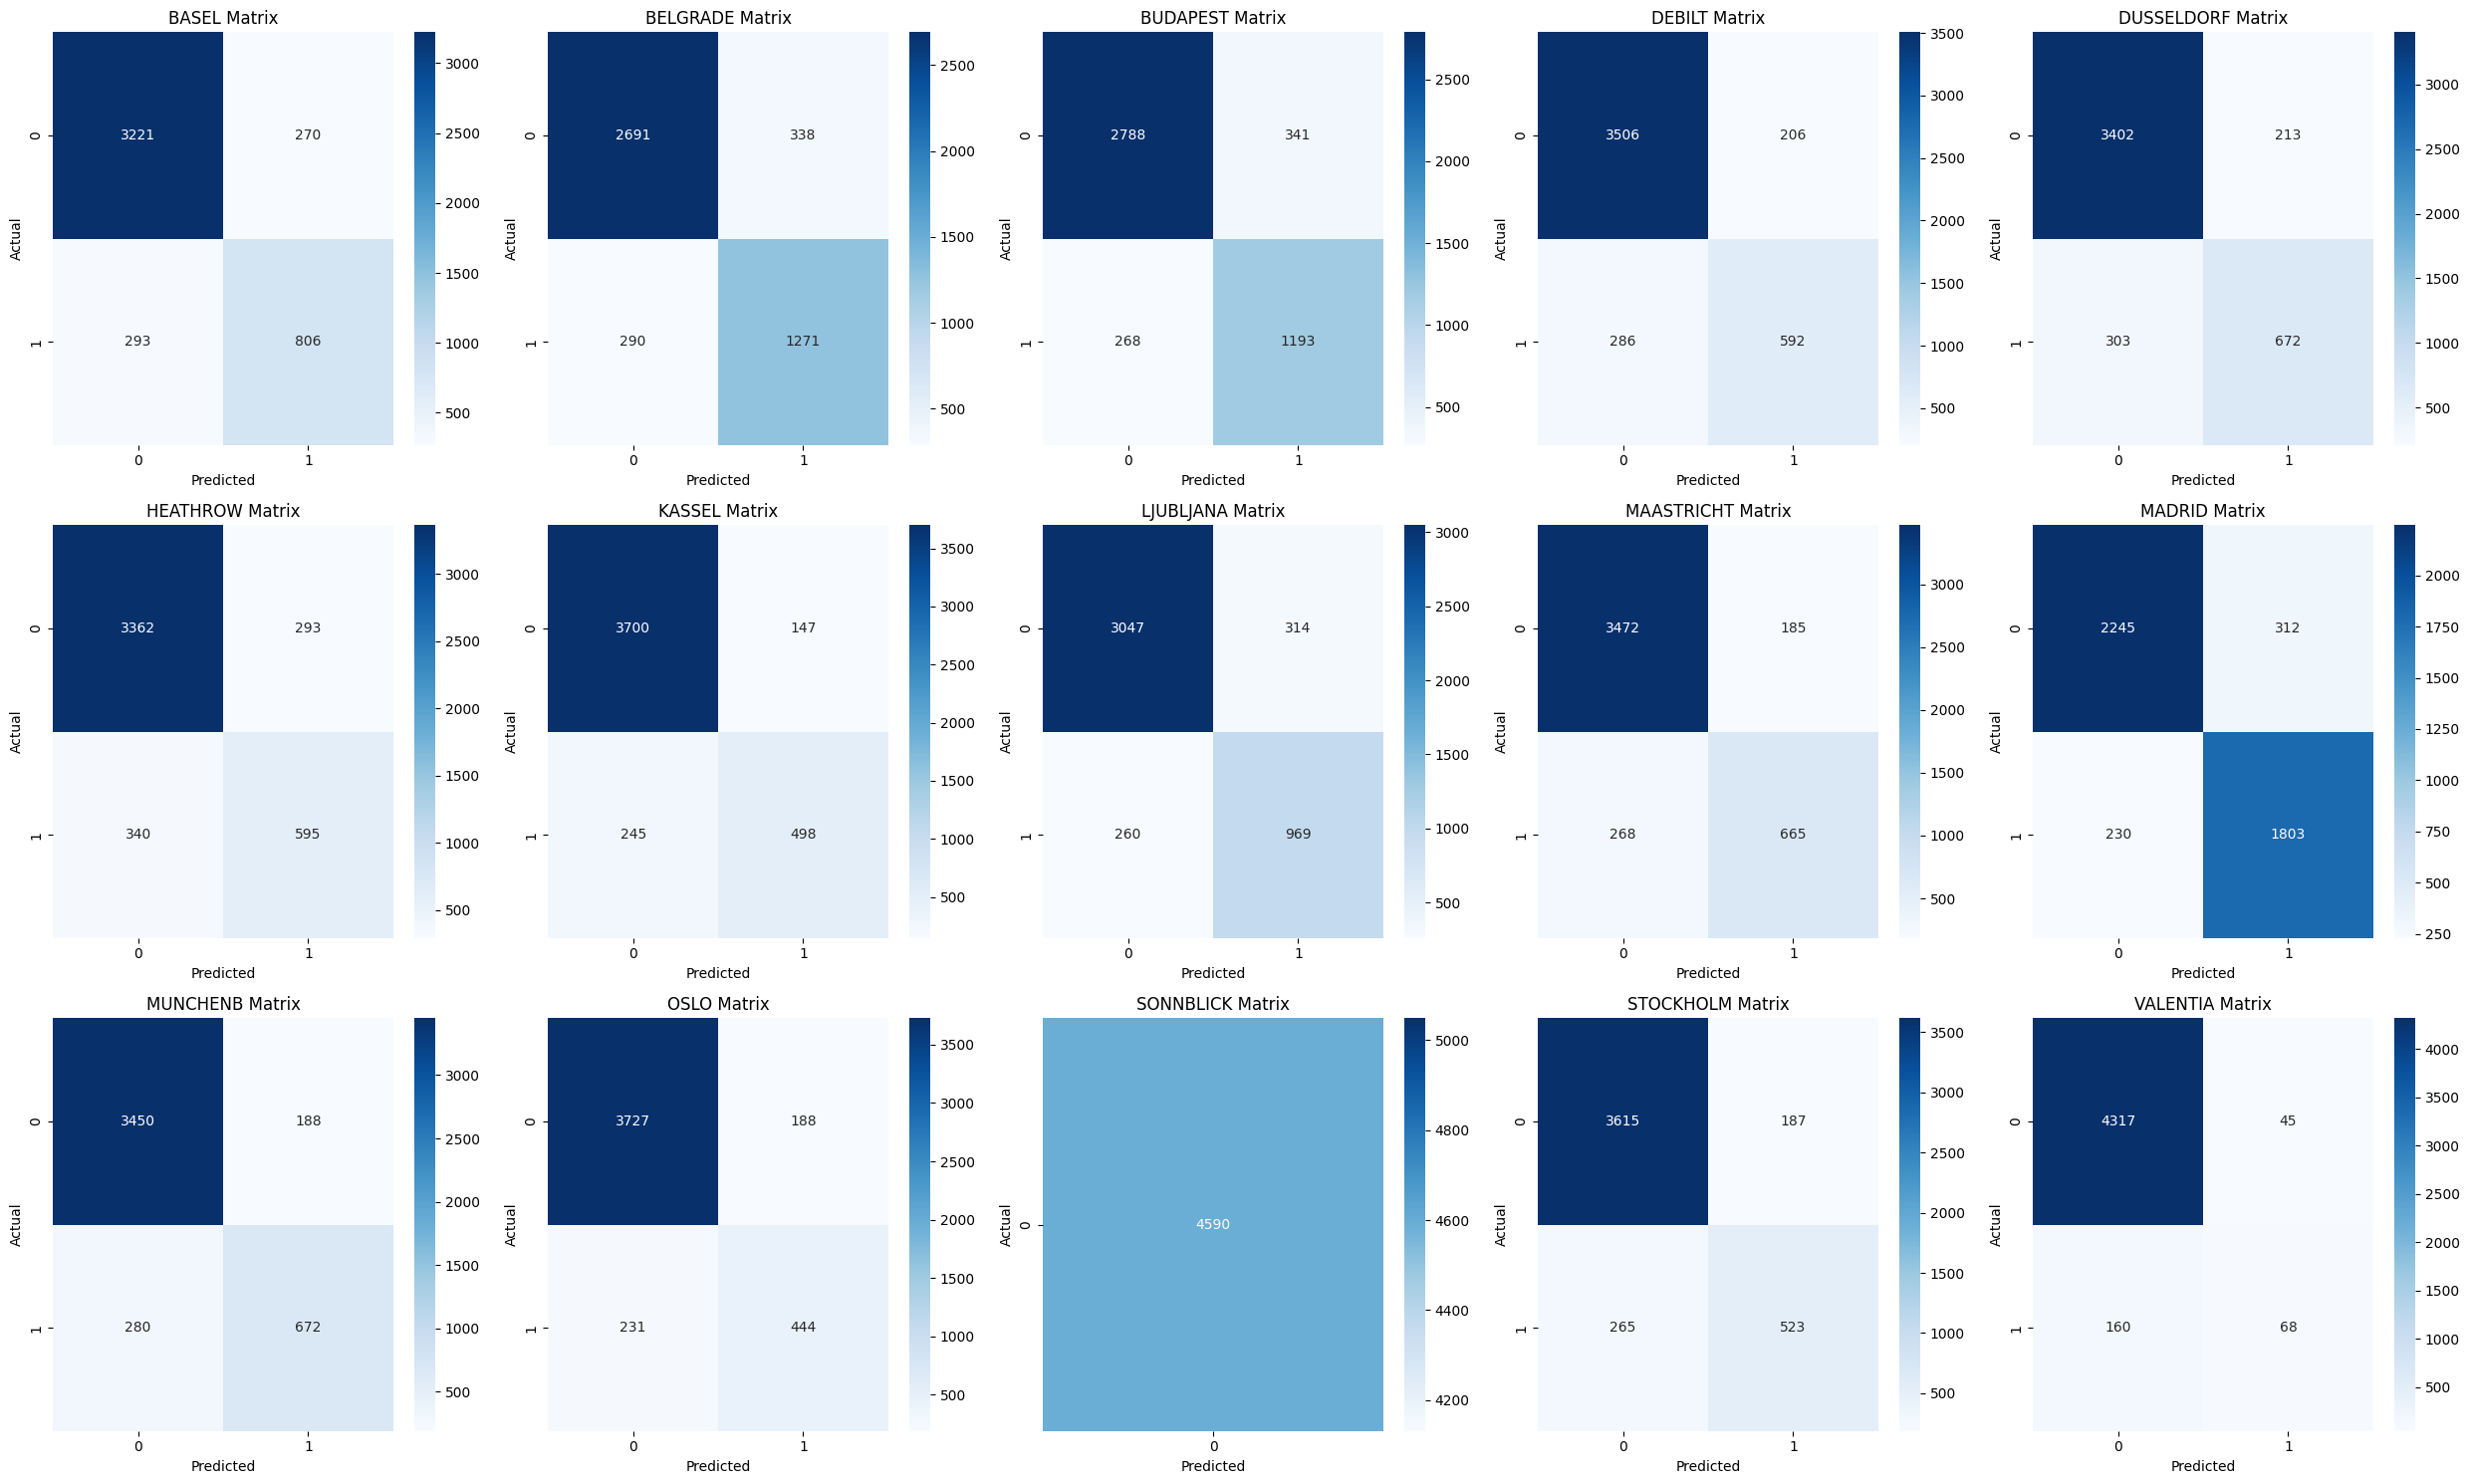

In [21]:
best_k = k_range[np.argmax(test_acc)]
print("Best k selected:", best_k)

# Fit final model using best k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
classifier = MultiOutputClassifier(final_knn, n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Extract station names from answers columns
locations = [col.replace('_pleasant_weather', '') for col in y_test.columns]
locations.sort()

# Plot confusion matrix for each station
fig, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
for i in range(3):
    for j in range(5):
        station = locations[count]
        col_name = station + "_pleasant_weather"
        cm = confusion_matrix(y_test[col_name], y_pred[:, count])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
        ax[i, j].set_title(f"{station} Matrix")
        ax[i, j].set_xlabel("Predicted")
        ax[i, j].set_ylabel("Actual")
        count += 1

plt.tight_layout()
plt.show()


# 9. Observations & Conclusion

## 9. Observations and Conclusion

The K-Nearest Neighbors (KNN) model was used to predict pleasant weather conditions across 15 European weather stations. Based on the test results, the best-performing `k` value was 3, which provided a balance between accuracy and overfitting.

The confusion matrices reveal significant variation in prediction performance across stations. For example, stations such as SONNBLICK and VALENTIA show exceptionally high accuracy, suggesting that weather patterns in those regions may be more predictable. In contrast, stations like BELGRADE and MADRID exhibit more false positives or negatives, indicating inconsistent weather or less clear separation in conditions.

A key observation is that the model performs well for stations with consistent historical trends, but struggles where weather is more volatile. The accuracy drop between training and test sets also highlights mild overfitting, especially at `k=1`.

To improve performance, future steps could include trying different algorithms (like decision trees or ensemble methods), feature selection, or resampling techniques. This would help generalize the model better across diverse conditions.

Overall, the KNN algorithm provides a reasonable baseline, but additional refinement is needed for broader deployment in real-world weather prediction.
